# 8.5. Batch Normalization
8.5. Normalização em lote

- Técnica que estabiliza e acelera o treinamento de redes neurais profundas.
- Esta normaliza as ativações dentro de uma camada subtraindo a média e dividindo pelo desvio padrão do mini-lote.
- As ativações normalizadas são então dimensionadas e alteradas usando parâmetros que podem ser aprendidos: os parâmetros de escala (gama) e deslocamento (beta).
- Proporciona bom desempenho quando aplicada a cada camada em redes mais profundas.
- BatchNorm: deve ser aplicado após camada convolucional e antes da função de ativação.

Treinar redes neurais profundas é difícil. Fazê-las convergir em um período de tempo razoável pode ser complicado. Nesta seção, descrevemos a normalização em lote , uma técnica popular e eficaz que acelera consistentemente a convergência de redes profundas.

Junto com blocos residuais — abordados mais adiante na Seção 8.6 — a normalização em lote tornou possível para os praticantes treinar rotineiramente redes com mais de 100 camadas. Um benefício secundário (serendipitoso) da normalização em lote está em sua regularização inerente.

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

# 8.5.1. Treinamento de Redes Profundas

Ao trabalhar com dados, frequentemente pré-processamos antes do treinamento. As escolhas relacionadas ao pré-processamento de dados frequentemente fazem uma enorme diferença nos resultados finais. 

Lembre-se de nossa aplicação de MLPs para prever preços de casas ( Seção 5.7 ). Nosso primeiro passo ao trabalhar com dados reais foi padronizar nossos recursos de entrada para ter média zero e variância unitária através de múltiplas observações ( Friedman, 1987 ) , frequentemente redimensionando a última para que a diagonal seja unitária.

Essas técnicas de pré-processamento e muitas outras são benéficas para manter o problema de estimativa bem controlado.

Segundo, para um MLP ou CNN típico, conforme treinamos, as variáveis ​​em camadas intermediárias (por exemplo, saídas de transformação afim em MLP) podem assumir valores com magnitudes amplamente variáveis: seja ao longo das camadas de entrada para saída, entre unidades na mesma camada e ao longo do tempo devido às nossas atualizações nos parâmetros do modelo. 

Os inventores da normalização em lote postularam informalmente que esse desvio na distribuição de tais variáveis ​​poderia dificultar a convergência da rede. Intuitivamente, podemos conjeturar que se uma camada tiver ativações variáveis ​​que são 100 vezes maiores que as de outra camada, isso pode necessitar de ajustes compensatórios nas taxas de aprendizado.

Terceiro, redes mais profundas são complexas e tendem a ser mais propensas a overfitting. Isso significa que a regularização se torna mais crítica. Uma técnica comum para regularização é a injeção de ruído. Isso é conhecido há muito tempo, por exemplo, com relação à injeção de ruído para as entradas ( Bishop, 1995 ) . Também forma a base do dropout na Seção 5.6 . __Como se vê, de forma bastante fortuita, a normalização em lote transmite todos os três benefícios: pré-processamento, estabilidade numérica e regularização.__

A normalização em lote é aplicada a camadas individuais ou, opcionalmente, a todas elas: em cada iteração de treinamento, primeiro normalizamos as entradas (da normalização em lote) subtraindo sua média e dividindo por seu desvio padrão, onde ambos são estimados com base nas estatísticas do minibatch atual. Em seguida, aplicamos um coeficiente de escala e um deslocamento para recuperar os graus de liberdade perdidos. É precisamente devido a essa normalização com base em estatísticas de lote que a normalização em lote deriva seu nome.

Uma conclusão aqui é que, ao aplicar a normalização de lote, a escolha do tamanho do lote é ainda mais significativa do que sem a normalização de lote, ou pelo menos, uma calibração adequada é necessária, pois podemos ajustar o tamanho do lote.

Após aplicar a padronização, o minibatch resultante tem média zero e variância unitária. A escolha da variância unitária (em vez de algum outro número mágico) é arbitrária.

A experiência prática confirma que, como aludido ao discutir o redimensionamento de recursos, a normalização em lote parece permitir taxas de aprendizado mais agressivas

 Isso acaba sendo um tema recorrente no aprendizado profundo. Por razões que ainda não estão bem caracterizadas teoricamente, várias fontes de ruído na otimização geralmente levam a um treinamento mais rápido e menos overfitting: essa variação parece atuar como uma forma de regularização

 __Em particular, isso lança alguma luz sobre o enigma de por que a normalização de lotes funciona melhor para tamanhos moderados de minibatch na faixa de 50–100.__ Esse tamanho específico de minibatch parece injetar apenas a “quantidade certa” de ruído por camada.
Um minibatch maior regulariza menos devido às estimativas mais estáveis, enquanto minibatch minúsculos destroem sinal útil devido à alta variância. 

 No entanto, uma vez que o modelo é treinado, podemos calcular as médias e variâncias das variáveis de cada camada com base em todo o conjunto de dados. De fato, essa é uma prática padrão para modelos que empregam normalização de lote; portanto, as camadas de normalização de lote funcionam de forma diferente no modo de treinamento (normalização por estatísticas de minilote) do que no modo de previsão (normalização por estatísticas de conjunto de dados). Nesta forma, elas se assemelham muito ao comportamento da regularização de abandono (Dropout) da Seção 5.6, onde o ruído é injetado apenas durante o treinamento.

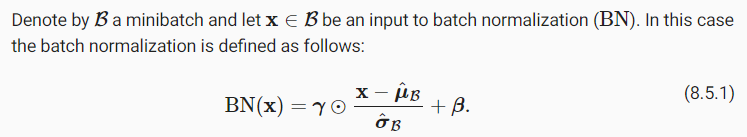

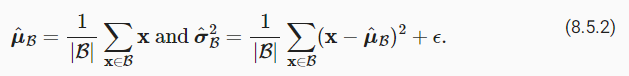
 

# 8.5.2. Camadas de Normalização em Lote

__Implementações de normalização de lote para camadas totalmente conectadas e camadas convolucionais são ligeiramente diferentes.__ Uma diferença fundamental entre a normalização de lote e outras camadas é que, como a primeira opera em um minibatch completo por vez, não podemos simplesmente ignorar a dimensão do lote como fizemos antes ao introduzir outras camadas.

# 8.5.2.1. Camadas totalmente conectadas

Aplicações posteriores experimentaram inserir a normalização em lote logo após as funções de ativação.

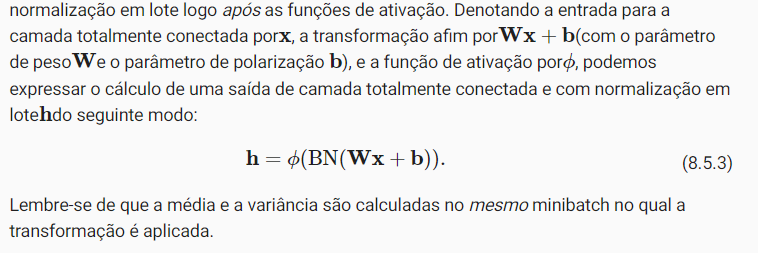

# 8.5.2.2. Camadas convolucionais

 A principal diferença da normalização em lote em camadas totalmente conectadas é que aplicamos a operação em uma base por canal em todos os locais . 
 

# 8.5.2.3. Normalização de Camadas (Layer Normalization - LN)

Note que no contexto de convoluções a normalização de lote é bem definida mesmo para minibatches de tamanho 1: afinal, temos todos os locais em uma imagem para calcular a média. Consequentemente, a média e a variância são bem definidas, mesmo que seja apenas dentro de uma única observação. Essa consideração levou Ba et al. ( 2016 ) a introduzir a noção de normalização de camada . Ela funciona exatamente como uma norma de lote, só que é aplicada a uma observação por vez.

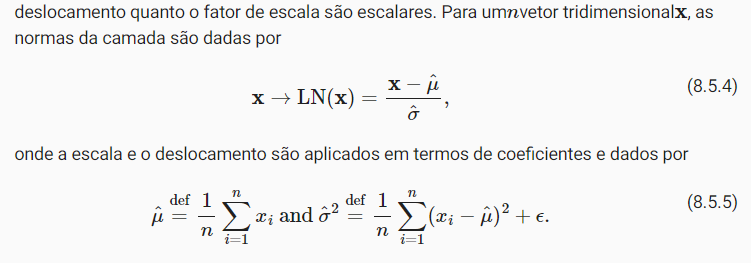

Um dos principais benefícios de usar a normalização de camadas é que ela evita a divergência. 
A saída da normalização da camada é independente da escala.
Outra vantagem da normalização de camadas é que ela não depende do tamanho do minibatch. Ela também é independente de estarmos em regime de treinamento ou teste. Em outras palavras, é simplesmente uma transformação determinística que padroniza as ativações para uma determinada escala

# 8.5.2.4. Normalização em lote durante a previsão

Como mencionamos anteriormente, a normalização de lote normalmente se comporta de forma diferente no modo de treinamento do que no modo de previsão. Primeiro, o ruído na média da amostra e a variância da amostra decorrente da estimativa de cada um em minilotes não são mais desejáveis ​​depois que treinamos o modelo. 

Portanto, a normalização de lote se comporta de forma diferente durante o treinamento do que no momento do teste. Lembre-se de que o dropout também exibe essa característica.



# 8.5.3. Implementação do zero

Para ver como a normalização em lote funciona na prática, implementamos uma do zero abaixo.

In [2]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

Agora podemos criar uma camada BatchNorm  adequada. Nossa camada manterá parâmetros adequados para escala __gamma__ e deslocamento __beta__, ambos os quais serão atualizados no curso do treinamento. Além disso, nossa camada manterá médias móveis das médias e variâncias para uso subsequente durante a previsão do modelo.

Observe também que, por uma questão de conveniência, não nos preocupamos em inferir automaticamente a forma de entrada aqui; portanto, precisamos especificar o número de recursos ao longo. Agora, todas as estruturas modernas de aprendizado profundo oferecem detecção automática de tamanho e forma nas APIs de normalização de lote de alto nível (na prática, usaremos isso).


In [3]:
class BatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

# 8.5.4. LeNet com Normalização em Lote

Para ver como aplicar Batch Norm (BN) em contexto, abaixo aplicamos a um modelo LeNet tradicional ( Seção 7.6 ). 

__Lembre-se de que a normalização em lote é aplicada após as camadas convolucionais ou camadas totalmente conectadas, mas antes das funções de ativação correspondentes.__

In [5]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5),                             # camada convolucional.
            BatchNorm(num_features=6, num_dims=4),                       # BatchNorm: após camada convolucional e antes da função de ativação.
            nn.Sigmoid(),                                                # Função de ativação.
            nn.AvgPool2d(kernel_size=2, stride=2),
            
            nn.LazyConv2d(16, kernel_size=5), 
            BatchNorm(16, num_dims=4),
            nn.Sigmoid(), 
            nn.AvgPool2d(kernel_size=2, stride=2),
            
            nn.Flatten(), 
            
            nn.LazyLinear(120),                                          # camada totalmente conectada.
            BatchNorm(120, num_dims=2),                                  # BatchNorm: após camada totalmente conectada e antes da função de ativação.
            nn.Sigmoid(),                                                # Função de ativação.
            
            nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), 
            nn.Sigmoid(),
            nn.LazyLinear(num_classes))

# BatchNorm: 
# Após camadas convolucionais: num_dims=4.
# Após camadas totalmente conectadas: num_dims=2.

LeNet original: 

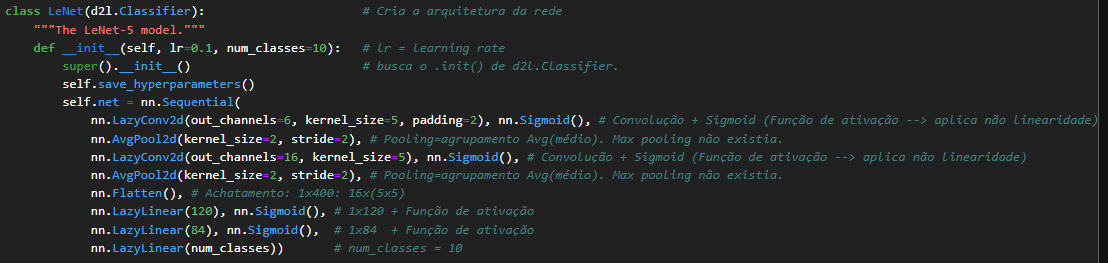

Como antes, treinaremos nossa rede no conjunto de dados Fashion-MNIST. Este código é virtualmente idêntico ao de quando treinamos o LeNet pela primeira vez.

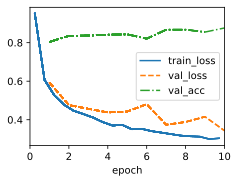

In [6]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)    # aplica a função init_cnn, que realiza a inicialização Xavier
trainer.fit(model, data)

Vamos dar uma olhada no parâmetro de escala gammae no parâmetro de deslocamento betaaprendidos na primeira camada de normalização em lote.

In [7]:
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

(tensor([1.8972, 1.9720, 2.2519, 1.7884, 1.8491, 1.6443], device='cuda:0',
        grad_fn=<ViewBackward0>),
 tensor([-0.8411, -1.3260, -1.2358,  0.6334, -1.1078,  0.8173], device='cuda:0',
        grad_fn=<ViewBackward0>))

In [8]:
# ------------------------------------------------------------------------------------
# PEGAR y_hat e imprimir acc:
# ------------------------------------------------------------------------------------
# SOLUÇÃO 1: treinamento sem GPU: # trainer = d2l.Trainer(max_epochs=10)
# y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
# print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')
# ------------------------------------------------------------------------------------
# SOLUÇÃO 2: treinar com gpu e transferir o dataset para a GPU.

# Verifica qual dispositivo está disponível: CPU ou GPU (cuda)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
device = get_default_device()              # dispositivo utilizado

# Transfere 'data' para 'device'
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

val2 = to_device(data.val.data, device)                     # transfere os dados de validação (data.val.data) da cpu para a gpu
y_hat = model(val2.type(torch.float32).unsqueeze(dim=1))
print(y_hat)

targets2 = to_device(data.val.targets, device)                     # transfere os dados de targets (data.val.targets) da cpu para a gpu
print(f'acc: {model.accuracy(y_hat,targets2).item():.2f}')
# ------------------------------------------------------------------------------------


tensor([[-1.9142, -2.1088, -1.4570,  ...,  1.1702,  0.2872,  6.4540],
        [ 2.1487, -2.9711,  8.2192,  ..., -3.8781, -0.6743, -3.5068],
        [-0.9487,  8.0426, -3.1757,  ..., -1.2573,  0.6626, -0.7269],
        ...,
        [ 1.1082, -4.2975,  0.4996,  ..., -1.8253,  7.2433, -4.0138],
        [-1.6706,  8.0745, -3.8673,  ..., -0.7915, -1.6981,  0.2186],
        [-1.9851, -2.6644, -0.1753,  ...,  1.3619,  0.0122, -1.0251]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
acc: 0.88


# 8.5.5. Implementação concisa

Comparado com a BatchNorm classe, que nós mesmos acabamos de definir, podemos usar a BatchNorm classe __definida em APIs de alto nível do framework de aprendizado profundo__ diretamente. O código parece virtualmente idêntico à nossa implementação acima, exceto que não precisamos mais fornecer argumentos adicionais para que ele obtenha as dimensões corretas.

In [9]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), 
            nn.LazyBatchNorm2d(),                    # LazyBatchNorm2d: não precisa fornecer argumentos para obter as dimensões corretas.
            nn.Sigmoid(),                            # Função de ativação.
            nn.AvgPool2d(kernel_size=2, stride=2),
            
            nn.LazyConv2d(16, kernel_size=5), 
            nn.LazyBatchNorm2d(),
            nn.Sigmoid(), 
            nn.AvgPool2d(kernel_size=2, stride=2),
            
            nn.Flatten(), 
            
            nn.LazyLinear(120), 
            nn.LazyBatchNorm1d(),
            nn.Sigmoid(), 
            
            nn.LazyLinear(84), 
            nn.LazyBatchNorm1d(),
            nn.Sigmoid(), 
            nn.LazyLinear(num_classes))

# LazyBatchNorm2d: Após camadas convolucionais.
# LazyBatchNorm1d: Após camadas totalmente conectadas.
# Batch Norm: após camada convolucional (ou camada totalmente conectada) e antes da função de ativação.

Abaixo, usamos os mesmos hiperparâmetros para treinar nosso modelo. Observe que, como de costume, a variante de API de alto nível roda muito mais rápido porque seu código foi compilado para C++ ou CUDA, enquanto nossa implementação personalizada deve ser interpretada por Python.

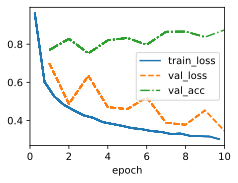

In [10]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [11]:
# ------------------------------------------------------------------------------------
# PEGAR y_hat e imprimir acc:
# ------------------------------------------------------------------------------------
# SOLUÇÃO 1: treinamento sem GPU: # trainer = d2l.Trainer(max_epochs=10)
# y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
# print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')
# ------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------
# SOLUÇÃO 2: treinar com gpu e transferir o dataset para a GPU.

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
val2 = data.val.data                    
val2 = val2.to(device)                                        # transfere val2 para o device disponível

y_hat = model(val2.type(torch.float32).unsqueeze(dim=1))
print(y_hat)

targets2 = data.val.targets                   
targets2 = targets2.to(device)                                # transfere targets2 para o device disponível
print(f'acc: {model.accuracy(y_hat,targets2).item():.2f}')
# ------------------------------------------------------------------------------------


tensor([[-1.2277, -1.3183, -0.1648,  ...,  2.8171,  0.5695,  8.7489],
        [ 1.9381, -3.0461,  8.9950,  ..., -2.8945, -3.3454, -1.3239],
        [ 0.6181,  7.1057, -0.6628,  ..., -3.4545, -2.3120, -1.2890],
        ...,
        [-0.8777, -1.4868,  0.2605,  ..., -4.1027,  7.0903, -4.7506],
        [-1.4144,  7.2586, -2.2495,  ..., -1.9435, -1.7138, -4.5862],
        [-2.6712,  0.2142, -3.3574,  ...,  3.2839,  2.7048, -0.9703]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
acc: 0.83


# Código Agrupado

tensor([[-4.1237, -1.4895, -3.1241,  ..., -0.2691,  1.9122,  0.3577],
        [-0.3878,  1.7288,  1.7003,  ..., -4.9398,  0.7500, -6.1383],
        [ 0.1953,  9.1849, -3.1397,  ..., -2.6832,  1.2133, -2.9239],
        ...,
        [ 0.4100, -1.6756, -2.4332,  ..., -4.1806,  8.4161, -6.6515],
        [-0.2164, 12.5634, -1.5519,  ..., -4.4487,  0.9094, -4.6690],
        [-3.2268, -1.2575, -1.9532,  ..., -2.9498,  4.0899, -3.8409]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
acc: 0.52


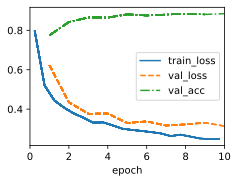

In [30]:
import torch
from torch import nn
from d2l import torch as d2l

# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

def init_cnn(module):  #@save
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:       # caso o módulo seja linear ou convolucional, realiza a inicialização Xavier.
        nn.init.xavier_uniform_(module.weight)                       # inicialização Xavier.

# ------------------------------------------------------------------------------------
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), 
            nn.LazyBatchNorm2d(),                    # LazyBatchNorm2d: não precisa fornecer argumentos para obter as dimensões corretas.
            nn.Sigmoid(),                            # Função de ativação.
            nn.AvgPool2d(kernel_size=2, stride=2),
            
            nn.LazyConv2d(16, kernel_size=5), 
            nn.LazyBatchNorm2d(),
            nn.Sigmoid(), 
            nn.AvgPool2d(kernel_size=2, stride=2),
            
            nn.Flatten(), 
            
            nn.LazyLinear(120), 
            nn.LazyBatchNorm1d(),
            nn.Sigmoid(), 
            
            nn.LazyLinear(84), 
            nn.LazyBatchNorm1d(),
            nn.Sigmoid(), 
            nn.LazyLinear(num_classes))

# LazyBatchNorm2d: Após camadas convolucionais.
# LazyBatchNorm1d: Após camadas totalmente conectadas.
# Batch Norm: após camada convolucional (ou camada totalmente conectada) e antes da função de ativação.
# ------------------------------------------------------------------------------------

# @d2l.add_to_class(d2l.Classifier)  #@save
# def layer_summary(self, X_shape):
#     X = torch.randn(*X_shape)
#     for layer in self.net:
#         X = layer(X)                                                 # aplica a entrada X por cada camada em self.net = model.net
#         print(layer.__class__.__name__, 'output shape:\t', X.shape)

# model = BNLeNet(lr=0.1)                                                  # cria o modelo
model = BNLeNet(lr=1)                                                    
a = model.layer_summary((3, 1, 28, 28))                                  # verifica a arquitetura do modelo para o shape indicado (que será o shape de X)

# ------------------------------------------------------------------------------------

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
# model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)


# ------------------------------------------------------------------------------------
# PEGAR y_hat e imprimir acc:
# ------------------------------------------------------------------------------------
# SOLUÇÃO 1: treinamento sem GPU: # trainer = d2l.Trainer(max_epochs=10)
# y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
# print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')
# ------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------
# SOLUÇÃO 2: treinar com gpu e transferir o dataset para a GPU.

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
val2 = data.val.data                    
val2 = val2.to(device)                                        # transfere val2 para o device disponível

y_hat = model(val2.type(torch.float32).unsqueeze(dim=1))
print(y_hat)

targets2 = data.val.targets                   
targets2 = targets2.to(device)                                # transfere targets2 para o device disponível
print(f'acc: {model.accuracy(y_hat,targets2).item():.2f}')
# ------------------------------------------------------------------------------------


# 8.5.6. Discussão

Intuitivamente, acredita-se que a normalização em lote torna o cenário de otimização mais suave. No entanto, devemos ter cuidado para distinguir entre intuições especulativas e explicações verdadeiras para os fenômenos que observamos ao treinar modelos profundos. __Lembre-se de que nem sabemos por que redes neurais profundas mais simples (MLPs e CNNs convencionais) generalizam bem em primeiro lugar.__ Mesmo com abandono (dropout) e decaimento de peso (weight decay), elas permanecem tão flexíveis que sua capacidade de generalizar para dados não vistos provavelmente precisa de garantias de generalização teórica de aprendizagem significativamente mais refinadas.

O artigo original propondo a normalização em lote ( Ioffe e Szegedy, 2015 ) , além de apresentar uma ferramenta poderosa e útil, ofereceu uma explicação de por que ela funciona: reduzindo o deslocamento interno da covariável . Presumivelmente, por deslocamento interno da covariável eles queriam dizer algo como a intuição expressa acima — a noção de que a distribuição de valores de variáveis muda ao longo do treinamento.

No entanto, havia dois problemas com essa explicação: 
- i) Esse desvio é muito diferente do deslocamento da covariável , tornando o nome um nome impróprio. No mínimo, está mais próximo do desvio de conceito.
- ii) A explicação oferece uma intuição subespecificada, mas deixa a questão de por que exatamente essa técnica funciona em aberto, carente de uma explicação rigorosa.

__A normalização em lote provou ser um método indispensável, aplicado em quase todos os classificadores de imagem implantados, rendendo ao artigo que introduziu a técnica dezenas de milhares de citações.__

- Durante o treinamento do modelo, a normalização em lote ajusta continuamente a saída intermediária da rede utilizando a média e o desvio padrão do minilote, para que os valores da saída intermediária em cada camada em toda a rede neural sejam mais estáveis.

- A normalização em lote é ligeiramente diferente para camadas totalmente conectadas do que para camadas convolucionais. Na verdade, para camadas convolucionais, a normalização de camadas pode às vezes ser usada como uma alternativa.

- Assim como uma camada de abandono, as camadas de normalização em lote têm comportamentos diferentes no modo de treinamento e no modo de previsão.

- A normalização em lote é útil para regularização e melhoria da convergência na otimização. Por outro lado, a motivação original de reduzir a mudança de covariância interna parece não ser uma explicação válida.

- Para modelos mais robustos e menos sensíveis a perturbações de entrada, considere remover a normalização de lote ( Wang et al. , 2022 ) .

# 8.5.7. Exercícios

# Ex. 1 - Devemos remover o parâmetro de bias da camada totalmente conectada ou da camada convolucional antes da normalização do lote? Por quê?

Fully Connected (Linear) Layer:

Remove Bias: It’s recommended to remove the bias parameter from the fully connected layer before applying batch normalization. This helps avoid the potential redundancy between the bias and beta parameters of batch normalization.
Convolutional Layer:

With Bias: Some architectures and setups use bias parameters in convolutional layers before batch normalization. The bias parameter can still provide flexibility in modeling, especially in the early stages of the network.
Without Bias: If you decide to remove the bias parameter from convolutional layers before batch normalization, you’re essentially letting batch normalization handle both the shifting and scaling of the activations.

# Ex. 2 - Compare as taxas de aprendizado do LeNet com e sem normalização em lote.

# Trace o aumento na precisão da validação.
lr_list = [0.001, 0.01, 0.03, 0.1, 0.3]

tensor([[-3.0398,  3.6847,  1.5628,  ...,  0.8122,  0.6359,  3.0895],
        [ 2.1971, -3.8145,  9.6686,  ..., -3.3499, -1.1333, -3.1903],
        [ 1.9005,  7.4396, -0.1094,  ..., -1.7994, -3.5702, -4.1459],
        ...,
        [ 1.9976, -2.6942,  1.5557,  ..., -1.2952,  7.5113, -7.1891],
        [-0.9921,  6.1621, -1.6599,  ...,  0.7692, -4.1456, -0.8350],
        [-2.3069,  1.2132, -1.0114,  ...,  0.2824,  5.7285, -2.9106]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
acc: 0.79


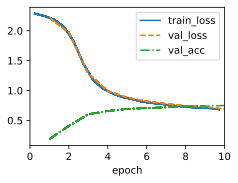

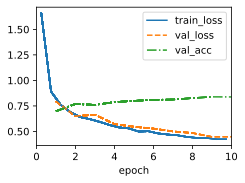

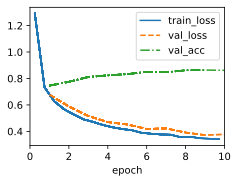

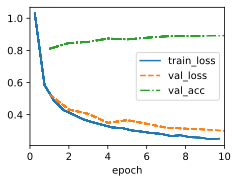

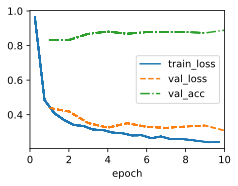

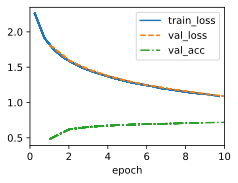

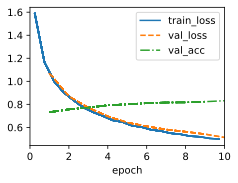

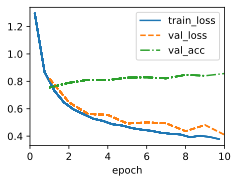

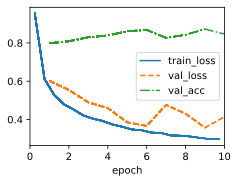

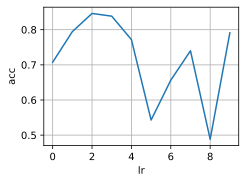

In [27]:
import torch
from torch import nn
from d2l import torch as d2l

# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

def init_cnn(module):  #@save
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:       # caso o módulo seja linear ou convolucional, realiza a inicialização Xavier.
        nn.init.xavier_uniform_(module.weight)                       # inicialização Xavier.

# ------------------------------------------------------------------------------------
class LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):   # lr = learning rate
        super().__init__()                        # busca o .init() de d2l.Classifier.
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),    # Convolução
            nn.MaxPool2d(kernel_size=2, stride=2),                     #  <<--------------------------------------------------------
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                     #  <<--------------------------------------------------------
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))
# ------------------------------------------------------------------------------------

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)                           # treinador
data = d2l.FashionMNIST(batch_size=128)                                    # dados

lr_list = [0.001, 0.01, 0.03, 0.1, 0.3]
accs = []
for i in lr_list:      
    model = LeNet(lr=i)                                                      # modelo
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)     # aplica a função init_cnn, que realiza a inicialização Xavier
    trainer.fit(model, data)                                                  # início do treinamento
    # PEGAR y_hat e imprimir acc:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    val2 = data.val.data                    
    val2 = val2.to(device)                                      # transfere val2 para o device disponível    
    y_hat = model(val2.type(torch.float32).unsqueeze(dim=1))
    print(y_hat)    
    targets2 = data.val.targets                   
    targets2 = targets2.to(device)                                # transfere targets2 para o device disponível
    acc = model.accuracy(y_hat,targets2).item()
    print(f'acc: {acc:.2f}')
    accs.append(acc)


# d2l.plot(list(range(len(accs))),accs,'lr - sem BN','acc')


# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), 
            nn.LazyBatchNorm2d(),                    # LazyBatchNorm2d: não precisa fornecer argumentos para obter as dimensões corretas.
            nn.Sigmoid(),                            # Função de ativação.
            nn.AvgPool2d(kernel_size=2, stride=2),
            
            nn.LazyConv2d(16, kernel_size=5), 
            nn.LazyBatchNorm2d(),
            nn.Sigmoid(), 
            nn.AvgPool2d(kernel_size=2, stride=2),
            
            nn.Flatten(), 
            
            nn.LazyLinear(120), 
            nn.LazyBatchNorm1d(),
            nn.Sigmoid(), 
            
            nn.LazyLinear(84), 
            nn.LazyBatchNorm1d(),
            nn.Sigmoid(), 
            nn.LazyLinear(num_classes))

# LazyBatchNorm2d: Após camadas convolucionais.
# LazyBatchNorm1d: Após camadas totalmente conectadas.
# Batch Norm: após camada convolucional (ou camada totalmente conectada) e antes da função de ativação.
# ------------------------------------------------------------------------------------

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)                           # treinador
data = d2l.FashionMNIST(batch_size=128)                                    # dados

lr_list = [0.001, 0.01, 0.03, 0.1, 0.3]
# accs = []
for i in lr_list:      
    model = BNLeNet(lr=i)                                                      # modelo
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)     # aplica a função init_cnn, que realiza a inicialização Xavier
    trainer.fit(model, data)                                                  # início do treinamento
    # PEGAR y_hat e imprimir acc:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    val2 = data.val.data                    
    val2 = val2.to(device)                                      # transfere val2 para o device disponível    
    y_hat = model(val2.type(torch.float32).unsqueeze(dim=1))
    print(y_hat)    
    targets2 = data.val.targets                   
    targets2 = targets2.to(device)                                # transfere targets2 para o device disponível
    acc = model.accuracy(y_hat,targets2).item()
    print(f'acc: {acc:.2f}')
    accs.append(acc)


d2l.plot(list(range(len(accs))),accs,'lr','acc')


# Qual é o tamanho máximo que você pode definir para a taxa de aprendizado antes que a otimização falhe em ambos os casos?

lr_list = [1,3,10,30]

tensor([[-3.4289, -1.8431, -3.3931,  ..., 11.3557,  3.3346, 16.2671],
        [-0.6561, -2.0140,  8.2416,  ..., -2.3672,  0.1066, -3.3854],
        [ 4.0387, 12.7846, -3.4099,  ..., -1.6128,  0.4973, -3.6846],
        ...,
        [ 1.3543,  0.5064, -0.9079,  ..., -1.0399, 10.0165, -1.4617],
        [ 1.5473, 12.0328, -3.9100,  ..., -0.2998,  0.4107, -3.1928],
        [ 0.5653, -2.0521, -1.8614,  ...,  1.2560,  7.9875,  5.2633]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
acc: 0.74


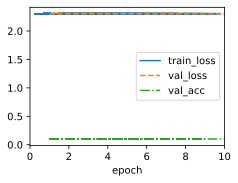

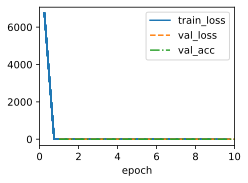

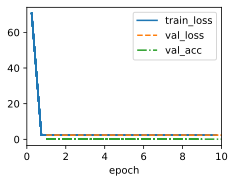

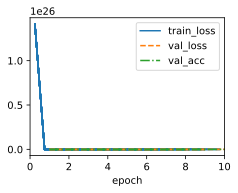

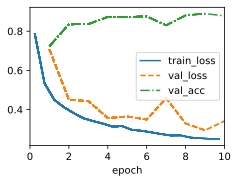

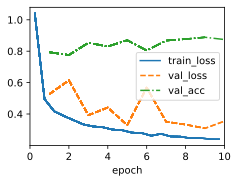

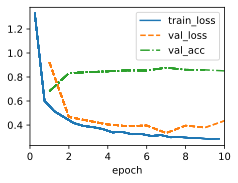

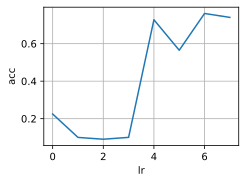

In [32]:
import torch
from torch import nn
from d2l import torch as d2l

# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

def init_cnn(module):  #@save
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:       # caso o módulo seja linear ou convolucional, realiza a inicialização Xavier.
        nn.init.xavier_uniform_(module.weight)                       # inicialização Xavier.

# ------------------------------------------------------------------------------------
class LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):   # lr = learning rate
        super().__init__()                        # busca o .init() de d2l.Classifier.
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),    # Convolução
            nn.MaxPool2d(kernel_size=2, stride=2),                     #  <<--------------------------------------------------------
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                     #  <<--------------------------------------------------------
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))
# ------------------------------------------------------------------------------------

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)                           # treinador
data = d2l.FashionMNIST(batch_size=128)                                    # dados

lr_list = [1,3,10,30]
accs = []
for i in lr_list:      
    model = LeNet(lr=i)                                                      # modelo
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)     # aplica a função init_cnn, que realiza a inicialização Xavier
    trainer.fit(model, data)                                                  # início do treinamento
    # PEGAR y_hat e imprimir acc:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    val2 = data.val.data                    
    val2 = val2.to(device)                                      # transfere val2 para o device disponível    
    y_hat = model(val2.type(torch.float32).unsqueeze(dim=1))
    print(y_hat)    
    targets2 = data.val.targets                   
    targets2 = targets2.to(device)                                # transfere targets2 para o device disponível
    acc = model.accuracy(y_hat,targets2).item()
    print(f'acc: {acc:.2f}')
    accs.append(acc)


# d2l.plot(list(range(len(accs))),accs,'lr - sem BN','acc')


# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), 
            nn.LazyBatchNorm2d(),                    # LazyBatchNorm2d: não precisa fornecer argumentos para obter as dimensões corretas.
            nn.Sigmoid(),                            # Função de ativação.
            nn.AvgPool2d(kernel_size=2, stride=2),
            
            nn.LazyConv2d(16, kernel_size=5), 
            nn.LazyBatchNorm2d(),
            nn.Sigmoid(), 
            nn.AvgPool2d(kernel_size=2, stride=2),
            
            nn.Flatten(), 
            
            nn.LazyLinear(120), 
            nn.LazyBatchNorm1d(),
            nn.Sigmoid(), 
            
            nn.LazyLinear(84), 
            nn.LazyBatchNorm1d(),
            nn.Sigmoid(), 
            nn.LazyLinear(num_classes))

# LazyBatchNorm2d: Após camadas convolucionais.
# LazyBatchNorm1d: Após camadas totalmente conectadas.
# Batch Norm: após camada convolucional (ou camada totalmente conectada) e antes da função de ativação.
# ------------------------------------------------------------------------------------

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)                           # treinador
data = d2l.FashionMNIST(batch_size=128)                                    # dados

# lr_list = [0.001, 0.01, 0.03, 0.1, 0.3]
# accs = []
for i in lr_list:      
    model = BNLeNet(lr=i)                                                      # modelo
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)     # aplica a função init_cnn, que realiza a inicialização Xavier
    trainer.fit(model, data)                                                  # início do treinamento
    # PEGAR y_hat e imprimir acc:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    val2 = data.val.data                    
    val2 = val2.to(device)                                      # transfere val2 para o device disponível    
    y_hat = model(val2.type(torch.float32).unsqueeze(dim=1))
    print(y_hat)    
    targets2 = data.val.targets                   
    targets2 = targets2.to(device)                                # transfere targets2 para o device disponível
    acc = model.accuracy(y_hat,targets2).item()
    print(f'acc: {acc:.2f}')
    accs.append(acc)


d2l.plot(list(range(len(accs))),accs,'lr','acc')


# Ex. 3 - Precisamos de normalização em lote em cada camada? Experimente com isso.

Whether to apply batch normalization in every layer of a neural network is not a strict rule but a design choice that depends on the specific problem, architecture, and training dynamics. The decision can impact the model’s convergence, performance, and training stability. 

In conclusion, while applying batch normalization in every layer can have benefits, it’s important to consider the trade-offs and experiment with different configurations. The choice depends on your specific use case, the architecture of your model, the dataset, and computational constraints.

# Ex. 4 - Implemente uma versão “lite” de normalização de lote que remova apenas a média ou, alternativamente, uma que remova apenas a variância. Como ela se comporta?

Remove apenas a média de x.

tensor([[-4.2286, -6.8777, -4.5632,  ...,  8.4994,  2.7271,  8.1600],
        [ 2.7210, -6.7997,  5.8062,  ..., -6.8612,  4.9257, -5.8393],
        [ 1.6383, 10.3412,  0.2757,  ..., -2.6057, -6.6867, -6.2514],
        ...,
        [ 1.9564, -7.0096, -0.1611,  ..., -1.8527,  5.9614, -2.6562],
        [ 1.4465,  9.3991, -0.3356,  ..., -2.1390, -6.4538, -4.9670],
        [-3.5335, -0.6724, -3.7055,  ...,  6.6405,  0.4094,  1.4344]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
acc: 0.68


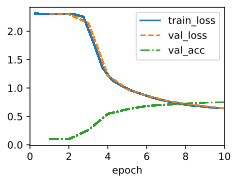

In [34]:
import torch
from torch import nn
from d2l import torch as d2l

# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

def batch_norm(X, gamma, beta, moving_mean, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)

        # In training mode, the current mean and variance are used
        X_hat = (X - mean)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data


class BatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)

        # Save the updated moving_mean and moving_var
        Y, self.moving_mean = batch_norm(
            X, self.gamma, self.beta, self.moving_mean, momentum=0.1)
        return Y


class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5),  # camada convolucional.
            BatchNorm(num_features=6, num_dims=4),
            # BatchNorm: após camada convolucional e antes da função de ativação.
            nn.Sigmoid(),  # Função de ativação.
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.LazyConv2d(16, kernel_size=5),
            BatchNorm(16, num_dims=4),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Flatten(),

            nn.LazyLinear(120),  # camada totalmente conectada.
            BatchNorm(120, num_dims=2),  # BatchNorm: após camada totalmente conectada e antes da função de ativação.
            nn.Sigmoid(),  # Função de ativação.

            nn.LazyLinear(84),
            BatchNorm(84, num_dims=2),
            nn.Sigmoid(),
            nn.LazyLinear(num_classes))


# BatchNorm:
# Após camadas convolucionais: num_dims=4.
# Após camadas totalmente conectadas: num_dims=2.


trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]],
                 d2l.init_cnn)  # aplica a função init_cnn, que realiza a inicialização Xavier
trainer.fit(model, data)

# ------------------------------------------------------------------------------------
# PEGAR y_hat e imprimir acc:
# ------------------------------------------------------------------------------------
# SOLUÇÃO 2: treinar com gpu e transferir o dataset para a GPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
val2 = data.val.data
val2 = val2.to(device)  # transfere val2 para o device disponível
y_hat = model(val2.type(torch.float32).unsqueeze(dim=1))
print(y_hat)
targets2 = data.val.targets
targets2 = targets2.to(device)  # transfere targets2 para o device disponível
print(f'acc: {model.accuracy(y_hat, targets2).item():.2f}')
# ------------------------------------------------------------------------------------




# Ex. 6 - Você pode substituir o dropout pela normalização em lote? Como o comportamento muda?

Dropout and batch normalization are two different techniques used for regularization in neural networks. While they both aim to prevent overfitting, they operate in distinct ways. Dropout involves randomly dropping out units (neurons) during training, while batch normalization normalizes activations in each layer. They serve different purposes, and replacing one with the other may not yield the same results.

# Outras respostas:

https://pandalab.me/archives/batch_normalization